In [1]:
from hwp_carbon.network import CarbonNetwork
from hwp_carbon.network_plotting import network_to_dot
from hwp_carbon.utils import excel_to_carbonnetwork_init_data, adjust_array

import matplotlib.pyplot as plt
%matplotlib inline

## Importing data

In [2]:
excel_path = '../tests/test_data.xlsx'

In [3]:
init_data = excel_to_carbonnetwork_init_data(excel_path)

In [4]:
init_data

{'pools': {'sawnwood': {'half_life': 35.0,
   'name': 'sawnwood',
   'long_name': 'sawnwood',
   'substitution_factor': array([0.54])},
  'veneer': {'half_life': 25.0,
   'name': 'veneer',
   'long_name': 'veneer',
   'substitution_factor': array([0.45])},
  'paper': {'half_life': 2.0,
   'name': 'paper',
   'long_name': 'paper',
   'substitution_factor': array([0.])},
  'bioenergy': {'half_life': 0.0,
   'name': 'bioenergy',
   'long_name': 'bioenergy',
   'substitution_factor': array([0.89])},
  'landfill_degradable': {'half_life': 11.748,
   'name': 'landfill_degradable',
   'long_name': 'landfill_degradable',
   'substitution_factor': array([0.])},
  'landfill_non_degradable': {'half_life': -1.0,
   'name': 'landfill_non_degradable',
   'long_name': 'landfill_non_degradable',
   'substitution_factor': array([0.])},
  'co2_emissions': {'half_life': -1.0,
   'name': 'co2_emissions',
   'long_name': 'co2_emissions',
   'substitution_factor': array([0.])},
  'ch4_emissions': {'half_lif

# Creating the network

In [5]:
net = CarbonNetwork(init_data)

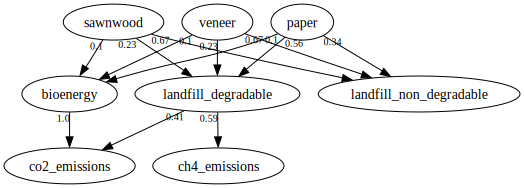

In [6]:
dot = network_to_dot(net)
dot.graph_attr['splines'] = 'spline' # 'ortho'
dot

# Simulate carbon flows

In [7]:
inputs = {'paper': [300, 0, 0, 100], 'veneer': [75], 'sawnwood':[200]}
steps = 100
net.run_simulation(inputs, steps=steps)

# Results

In [8]:
net.get_pools_attr('carbon_stock', as_dataframe=True)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
pool_name,,,,,,,,,,,,,,,,,,,,,
sawnwood,196.078122,192.233150,188.463575,184.767919,181.144733,177.592595,174.110113,170.695920,167.348677,164.067071,...,3.298770e+01,3.234083e+01,3.170665e+01,3.108490e+01,3.047534e+01,2.987774e+01,2.929185e+01,2.871746e+01,2.815433e+01,2.760224e+01
veneer,72.949121,70.954324,69.014074,67.126880,65.291292,63.505898,61.769326,60.080241,58.437343,56.839371,...,6.016059e+00,5.851549e+00,5.691539e+00,5.535903e+00,5.384524e+00,5.237283e+00,5.094070e+00,4.954772e+00,4.819284e+00,4.687500e+00
paper,212.132034,150.000000,76.776695,125.000000,88.388348,62.500000,44.194174,31.250000,22.097087,15.625000,...,1.004859e-11,7.105427e-12,5.024296e-12,3.552714e-12,2.512148e-12,1.776357e-12,1.256074e-12,8.881784e-13,6.280370e-13,4.440892e-13
bioenergy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
landfill_degradable,45.611399,74.640147,108.522568,129.602398,141.787367,147.831767,149.674795,148.679761,145.803213,141.714498,...,5.658718e+00,5.499964e+00,5.346801e+00,5.198986e+00,5.056285e+00,4.918479e+00,4.785357e+00,4.656721e+00,4.532381e+00,4.420980e+00
landfill_non_degradable,33.876855,58.914393,87.635899,108.980484,125.085825,137.464009,147.184757,155.004973,161.460357,166.930184,...,2.941175e+02,2.946611e+02,2.951932e+02,2.957141e+02,2.962239e+02,2.967229e+02,2.972114e+02,2.976896e+02,2.981577e+02,2.986159e+02
co2_emissions,11.398636,21.078074,32.391934,41.857929,49.946620,56.994498,63.243046,68.866368,73.990740,78.708439,...,1.741406e+02,1.743617e+02,1.745773e+02,1.747875e+02,1.749924e+02,1.751922e+02,1.753871e+02,1.755772e+02,1.757626e+02,1.759400e+02
ch4_emissions,2.953833,7.179913,12.195255,17.664389,23.355816,29.111231,34.823789,40.422738,45.862584,51.115436,...,1.620795e+02,1.622848e+02,1.624845e+02,1.626787e+02,1.628675e+02,1.630513e+02,1.632302e+02,1.634042e+02,1.635737e+02,1.637334e+02


In [9]:
net.get_flows_attr('values', as_dataframe=True)

0          1          2   \
src_pool            dst_pool                                                   
sawnwood            bioenergy                 0.392188   0.384497   0.376957   
                    landfill_degradable       0.902032   0.884344   0.867002   
                    landfill_non_degradable   2.627658   2.576131   2.525615   
paper               bioenergy                 8.786797   6.213203   7.322330   
                    landfill_degradable      49.206061  34.793939  41.005051   
                    landfill_non_degradable  29.875108  21.124892  24.895924   
veneer              bioenergy                 0.205088   0.199480   0.194025   
                    landfill_degradable       0.471702   0.458803   0.446257   
                    landfill_non_degradable   1.374089   1.336514   1.299967   
bioenergy           co2_emissions             9.384072   6.797180   7.893313   
landfill_degradable co2_emissions             2.014563   2.882258   3.420547   
                    ch4_emissions             2.953833   4.226081   5.015342   

                                                    3          4          5   \
src_pool            dst_pool                                                   
sawnwood            bioenergy                 0.369566   0.362319   0.355214   
                    landfill_degradable       0.850001   0.833333   0.816992   
                    landfill_non_degradable   2.476089   2.427535   2.379932   
paper               bioenergy                 5.177670   3.661165   2.588835   
                    landfill_degradable      28.994949  20.502525  14.497475   
                    landfill_non_degradable  17.604076  12.447962   8.802038   
veneer              bioenergy                 0.188719   0.183559   0.178539   
                    landfill_degradable       0.434054   0.422185   0.410641   
                    landfill_non_degradable   1.264420   1.229844   1.196214   
bioenergy           co2_emissions             5.735954   4.207043   3.122588   
landfill_degradable co2_emissions             3.730041   3.881648   3.925290   
                    ch4_emissions             5.469134   5.691426   5.755416   

                                                    6         7         8   \
src_pool            dst_pool                                                 
sawnwood            bioenergy                 0.348248  0.341419  0.334724   
                    landfill_degradable       0.800971  0.785264  0.769866   
                    landfill_non_degradable   2.333263  2.287509  2.242653   
paper               bioenergy                 1.830583  1.294417  0.915291   
                    landfill_degradable      10.251263  7.248737  5.125631   
                    landfill_non_degradable   6.223981  4.401019  3.111990   
veneer              bioenergy                 0.173657  0.168909  0.164290   
                    landfill_degradable       0.399412  0.388490  0.377866   
                    landfill_non_degradable   1.163503  1.131687  1.100741   
bioenergy           co2_emissions             2.352488  1.804745  1.414305   
landfill_degradable co2_emissions             3.896060  3.818577  3.710066   
                    ch4_emissions             5.712557  5.598949  5.439846   

                                                   9   ...            90  \
src_pool            dst_pool                           ...                 
sawnwood            bioenergy                0.328161  ...  6.598070e-02   
                    landfill_degradable      0.754769  ...  1.517556e-01   
                    landfill_non_degradable  2.198676  ...  4.420707e-01   
paper               bioenergy                0.647209  ...  4.162263e-13   
                    landfill_degradable      3.624369  ...  2.330867e-12   
                    landfill_non_degradable  2.200510  ...  1.415169e-12   
veneer              bioenergy                0.159797  ...  1.691344e-02   
                    landfill_degr

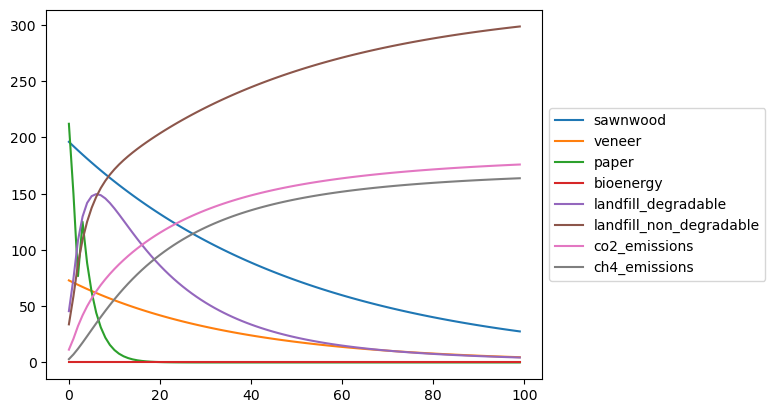

In [10]:
fig = net.get_pools_attr('carbon_stock', as_dataframe=True).T.plot()
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.get_figure().savefig('test_results_carbon_stocks.png', bbox_inches='tight')

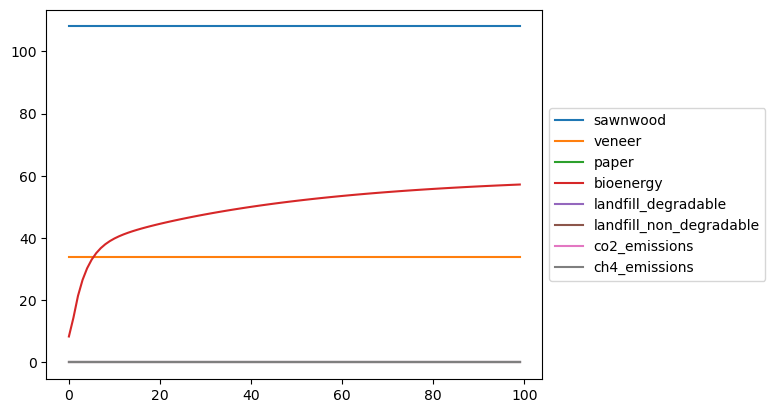

In [11]:
# Cumulative sum of carbon substitution
net.get_pools_attr('substitution', as_dataframe=True).T.cumsum().plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Speed test

In [13]:
%%timeit
inputs = {'paper': [100], 'veneer': [200], 'sawnwood':[250]}
net.run_simulation(inputs, steps=500)

9.01 ms ± 775 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
